In [1]:
import os,json,sys,itertools
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##need to add this additional cell because useful tools are in another folder. Need to integrate these two folders one day
current_working_directory = Path.cwd()
parent_dir = current_working_directory.resolve().parents[0]
sys.path.insert(0, str(parent_dir) + "\\utilities")
from useful_tools import select_animals_gpt,find_file
from quantify_color_spectrum import load_color_spectrum

In [2]:
##introduce some helper class to define colour gradient
import matplotlib as mpl
from matplotlib import cm
class MplColorHelper:
    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgb(self, val):
        return self.scalarMap.to_rgba(val)
colormap_name = "viridis"
#colormap_name = "cool"
colormap_name="Set1"

In [3]:
def list_up_files(thisDataset,file_type=".txt"):
    dir_list=[]
    for root, dirs, files in os.walk(thisDataset):
        for folder in dirs:
            folder_path=os.path.join(root,folder)
            for name in os.listdir(folder_path):
                if name.endswith(file_type):
                    this_file_dir=os.path.join(folder_path.replace("\\", "/"),name)
                    dir_list.append(this_file_dir.replace("\\", "/"))
    return dir_list

In [4]:
#sort list according to their time
def last_nchars(x):
    return(x[-16:])

In [ ]:
## data for gamma correction
multiple_trials=True
if multiple_trials:
    folders=["gray_scale","red_scale","green_scale","blue_scale"]
    Dataset_dir =Path("C:/Users/neuroPC/Documents/color_spetrum/matrexVR_20241104")
else:
    folders=["gray","red","green","blue"]
    Dataset_dir =Path("C:/Users/neuroPC/Documents/color_spetrum/matrexVR_20241127")
mean_auc_list=[]
for this_folder in folders:
    thisDataset=Dataset_dir / f"{this_folder}"
    if multiple_trials:
        dir_list=list_up_files(thisDataset)
    else:
        dir_list=[os.path.join(str(thisDataset),s) for s in os.listdir(str(thisDataset))]
    sorted_data_list=sorted(dir_list, key = last_nchars)
    auc_list=[]
    wavelength_list=[]
    for this_dir in sorted_data_list:
        if "archive" in this_dir:
            continue
        else:
            auc, wavelength=load_color_spectrum(this_dir)
            auc_list.append(auc)
            wavelength_list.append(wavelength)
    if multiple_trials:
        auc_array=np.reshape(np.array(auc_list),(2,-1))
        mean_auc_list.append(np.mean(auc_array,axis=0))
    else:
        mean_auc_list.append(np.array(auc_list))

In [18]:
#folders=["gregarious","yellow1","yellow2","green","white","black","3Dwhite","3Dblack"]
folders=["gregarious","yellow1","yellow2","green","white","black"]
exp="choice"
Dataset_dir =Path("C:/Users/neuroPC/Documents/color_spetrum/matrexVR_20241127")
mean_auc_list=[]
for this_folder in folders:
    thisDataset=Dataset_dir / f"{exp}_{this_folder}"
    dir_list=[os.path.join(str(thisDataset),s) for s in os.listdir(str(thisDataset))]
    sorted_data_list=sorted(dir_list, key = last_nchars)
    auc_list=[]
    wavelength_list=[]
    for this_dir in sorted_data_list:
        if "archive" in this_dir:
            print(f"skip archive folder for {this_dir}")
            continue
        else:
            print(f"no curated matrexvr h5 database in {this_dir}. Create curated file")
            auc, wavelength=load_color_spectrum(this_dir)
            auc_list.append(auc)
            wavelength_list.append(wavelength)
    #auc_array=np.reshape(np.array(auc_list),(2,-1))
    #mean_auc_list.append(auc_array[1,:])
    mean_auc_list.append(np.array(auc_list))

no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\choice_gregarious\choice_glocust1_AbsoluteIrradiance__0__13-21-35-147.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\choice_gregarious\choice_glocust1_AbsoluteIrradiance__1__13-21-45-147.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\choice_gregarious\choice_glocust1_AbsoluteIrradiance__2__13-21-53-147.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\choice_gregarious\choice_glocust1_AbsoluteIrradiance__3__13-22-03-147.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\choice_gregarious\choice_glocust1_AbsoluteIrradiance__4__13-22-11-146.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Doc

In [19]:
#thisDataset=Path("C:/Users/neuroPC/Documents/color_spetrum/matrexVR_20241127/background") background1 has problems during the acqusition
thisDataset=Path("C:/Users/neuroPC/Documents/color_spetrum/matrexVR_20241127/background2")
dir_list=[os.path.join(str(thisDataset),s) for s in os.listdir(str(thisDataset))]
sorted_data_list=sorted(dir_list, key = last_nchars)
auc_list=[]
wavelength_list=[]
for this_dir in sorted_data_list:
    if "archive" in this_dir:
        print(f"skip archive folder for {this_dir}")
        continue
    else:
        print(f"no curated matrexvr h5 database in {this_dir}. Create curated file")
        auc, wavelength=load_color_spectrum(this_dir)
        auc_list.append(auc)
        wavelength_list.append(wavelength)

no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\background2\grayscale2_AbsoluteIrradiance__0__14-51-35-037.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\background2\grayscale2_AbsoluteIrradiance__1__14-51-45-038.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\background2\grayscale2_AbsoluteIrradiance__2__14-51-53-038.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\background2\grayscale2_AbsoluteIrradiance__3__14-52-03-037.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\background2\grayscale2_AbsoluteIrradiance__4__14-52-11-038.txt. Create curated file
no curated matrexvr h5 database in C:\Users\neuroPC\Documents\color_spetrum\matrexVR_20241127\background2\gray

In [20]:
if exp=="choice":
    choice_mean_auc_list=mean_auc_list
    auc_array_conditions=np.vstack(choice_mean_auc_list)
else:
    band_mean_auc_list=mean_auc_list
    auc_array_conditions=np.vstack(band_mean_auc_list)

In [ ]:
background=np.array(auc_list)
background=background[0:16]

In [21]:
background2=np.array(auc_list)

In [22]:
m_contrast=abs(auc_array_conditions-background2)/(auc_array_conditions+background2)
w_contrast=(auc_array_conditions-background2)/background2

In [23]:
COL = MplColorHelper(colormap_name, 0, m_contrast.shape[0]-1)
sm = cm.ScalarMappable(cmap=colormap_name)
graph_colour_code=["r","m","y","g","c","k"]

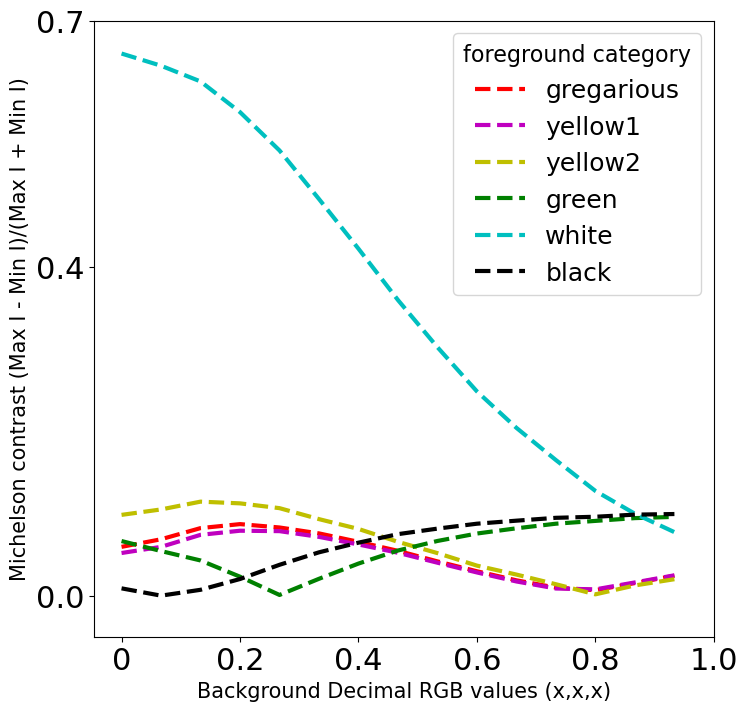

In [47]:
fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(8,8))
for i in range(m_contrast.shape[0]):
    ax1.plot(m_contrast[i,:-1],color=graph_colour_code[i],label=folders[i],linestyle='dashed',linewidth=3)
ax1.legend(title='foreground category',prop={'size': 18},title_fontsize=16)
ax1.set(
    xticks=[0,3,6,9,12,15],
    xticklabels=(['0','0.2','0.4','0.6','0.8','1.0']),
    xlabel=('Background Decimal RGB values (x,x,x)'),
    ylabel= ('Michelson contrast (Max I - Min I)/(Max I + Min I)'),
    yticks=[0.0,0.4,0.7],
    ylim=[-0.05,0.7])
ax1.xaxis.label.set(fontsize=15)
ax1.yaxis.label.set(fontsize=15)
#ax1.yaxis.label.set(fontsize=20)
#background1 suggest the 7th has closest contrast between black and gregarious

In [ ]:
#background  measurement
plt.plot(np.arange(background.shape[0]),background)